In [5]:
import numpy as np
import pandas as pd

# Loading Data
### Since the size of data is 185 million we are reading it in chunks

In [6]:
chunk_size = 10000  # Adjust the chunk size based on available memory
chunks = []
for chunk in pd.read_csv('train.csv', chunksize=chunk_size):
    # Process each chunk as needed
    chunks.append(chunk)

# After processing all chunks, you can concatenate them if necessary
data = pd.concat(chunks, axis=0)

In [7]:
import numpy as np
import pandas as pd

In [8]:
data.shape

(184903890, 8)

# Data Cleaning

### Row Engineering - To handle Data Imbalance

In [9]:
import pandas as pd
import numpy as np

# Specify the chunk size
chunk_size = 10000

# Initialize an empty list to store processed chunks
balanced_chunks = []

# Read and process each chunk
for chunk in pd.read_csv('train.csv', chunksize=chunk_size):
    # Process each chunk as needed

    # Specify the target variable name
    target_variable = 'is_attributed'

    # Count of fraudulent records in the current chunk
    fraudulent_count = chunk[target_variable].sum()

    # Get non-fraudulent indices
    non_fraudulent_indices = chunk[chunk[target_variable] == 0].index

    # Randomly sample a subset of non-fraudulent indices
    sampled_non_fraudulent_indices = np.random.choice(non_fraudulent_indices, size=int(1.6 * fraudulent_count), replace=False)

    # Combine fraudulent and non-fraudulent data for the current chunk
    balanced_chunk = pd.concat([chunk[chunk[target_variable] == 1], chunk.loc[sampled_non_fraudulent_indices]])

    # Shuffle the combined data for the current chunk
    balanced_chunk = balanced_chunk.sample(frac=1).reset_index(drop=True)

    # Append the balanced chunk to the list
    balanced_chunks.append(balanced_chunk)

# Concatenate the balanced chunks along the rows (axis=0)
balanced_data = pd.concat(balanced_chunks, axis=0, ignore_index=True)


In [10]:
balanced_data.shape

(1180387, 8)

### Missing values handling

In [11]:
missing_values = balanced_data.isnull().sum()
missing_values

ip                      0
app                     0
device                  0
os                      0
channel                 0
click_time              0
attributed_time    723541
is_attributed           0
dtype: int64

### Removing unwanted columns

In [12]:
balanced_data = balanced_data.drop(['attributed_time'], axis=1)

In [13]:
missing_values = balanced_data.isnull().sum()
missing_values

ip               0
app              0
device           0
os               0
channel          0
click_time       0
is_attributed    0
dtype: int64

### Dropping Duplicates

In [14]:
balanced_data = balanced_data.drop_duplicates()

In [15]:
balanced_data.shape

(1180068, 7)

### Datatype checking

In [16]:
balanced_data.dtypes

ip                int64
app               int64
device            int64
os                int64
channel           int64
click_time       object
is_attributed     int64
dtype: object

In [17]:
import pandas as pd
import pickle

# Assuming 'cleaned_data' is your cleaned DataFrame
balanced_data.to_pickle('cleaned_data.pkl')


# Exploratory Data Analysis (EDA)

In [18]:
import pandas as pd

# Calculate the value counts for the 'ip' column
ip_counts = balanced_data['ip'].value_counts()

# Convert to DataFrame for a tabular view
ip_counts_table = ip_counts.reset_index()
ip_counts_table.columns = ['IP', 'Count']

# Display the table
print(ip_counts_table)


            IP  Count
0         5348   7129
1         5314   6571
2        73487   3914
3        73516   3852
4        53454   2044
...        ...    ...
255372  224635      1
255373  234107      1
255374  249308      1
255375  240723      1
255376  313982      1

[255377 rows x 2 columns]


In [19]:
import pandas as pd

# Calculate the value counts for the 'app' column
app_counts = balanced_data['app'].value_counts()

# Convert to DataFrame for a tabular view
app_counts_table = app_counts.reset_index()
app_counts_table.columns = ['App ID', 'Count']

# Display all rows when printing
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(app_counts_table)


     App ID   Count
0         3  145339
1        19  135559
2        12   97360
3         2   90460
4         9   82071
5        18   69580
6        15   65062
7        35   64196
8        29   42354
9        14   42041
10       10   37202
11        5   28623
12        1   23943
13        8   21091
14       11   19102
15       13   17819
16       45   16546
17       21   14426
18       26   13918
19       72   11509
20       23   10763
21       20   10334
22        6    9726
23        7    8347
24       64    8006
25       27    7369
26       25    5803
27       24    5286
28       39    5256
29       28    5244
30       66    4210
31       17    3482
32       32    3125
33       22    2995
34       84    2798
35       83    2495
36       62    2215
37      107    2198
38       37    2173
39       50    1803
40       96    1740
41      108    1624
42       55    1567
43       79    1438
44       43    1388
45       36    1357
46       34    1157
47      150    1145
48      115    1136


In [20]:
import pandas as pd

# Calculate the value counts for the 'device' column
device_counts = balanced_data['device'].value_counts()

# Convert to DataFrame for a tabular view
device_counts_table = device_counts.reset_index()
device_counts_table.columns = ['Device ID', 'Count']

# Display all rows when printing
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(device_counts_table)


      Device ID   Count
0             1  989595
1             0  105553
2             2   33080
3             6    2966
4          3032    2890
5            40    2643
6            16    2228
7            18    1499
8            21    1175
9            33    1117
10         3543     946
11           67     820
12           30     815
13           88     758
14          114     727
15         3866     724
16           37     673
17          154     662
18          109     621
19            7     612
20           78     609
21           50     591
22           97     492
23           46     471
24           82     442
25           60     422
26          211     411
27           56     350
28          299     342
29          136     340
30          220     337
31           96     327
32            4     326
33           76     314
34           25     312
35          101     301
36          203     296
37          343     294
38          137     271
39            9     266
40           20 

In [21]:
import pandas as pd

# Calculate the value counts for the 'os' column
os_counts = balanced_data['os'].value_counts()

# Convert to DataFrame for a tabular view
os_counts_table = os_counts.reset_index()
os_counts_table.columns = ['OS ID', 'Count']

# Display all rows when printing
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(os_counts_table)


     OS ID   Count
0       19  252638
1       13  217840
2       17   48976
3       24   48746
4       18   46940
5       22   42089
6        0   39359
7       10   26761
8        8   26067
9        6   23686
10      15   21535
11      25   21247
12      20   20735
13       9   20239
14      29   19857
15      37   19593
16      21   19535
17      16   16275
18       3   13814
19      14   13702
20      32   13403
21      27   13136
22      38   12637
23      41   11819
24      47   11530
25      11   11443
26       1   10989
27      30   10525
28      12    9267
29      23    8555
30      36    8440
31      35    8091
32       4    8029
33      43    7049
34      50    6866
35      28    6517
36       7    6360
37      53    5909
38      61    5569
39      26    4730
40      40    4445
41      31    3975
42     607    3853
43      49    3593
44       2    2921
45     748    1804
46      42    1708
47     866    1628
48      34    1438
49      46    1283
50      59    1273
51      58  

/Users/saikrishnaadityagorthi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/saikrishnaadityagorthi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/saikrishnaadityagorthi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


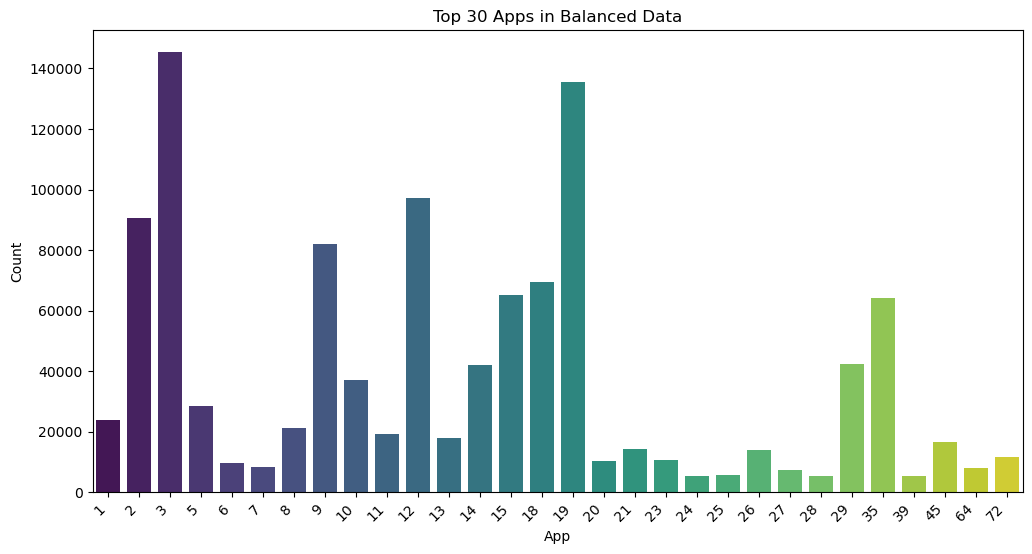

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 30 values for the 'app' column
top_apps = balanced_data['app'].value_counts().nlargest(30)

# Set the figure size
plt.figure(figsize=(12, 6))

# Use Seaborn for better visualization
sns.barplot(x=top_apps.index, y=top_apps, palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('App')
plt.ylabel('Count')
plt.title('Top 30 Apps in Balanced Data')

# Show the plot
plt.show()


/Users/saikrishnaadityagorthi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/saikrishnaadityagorthi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


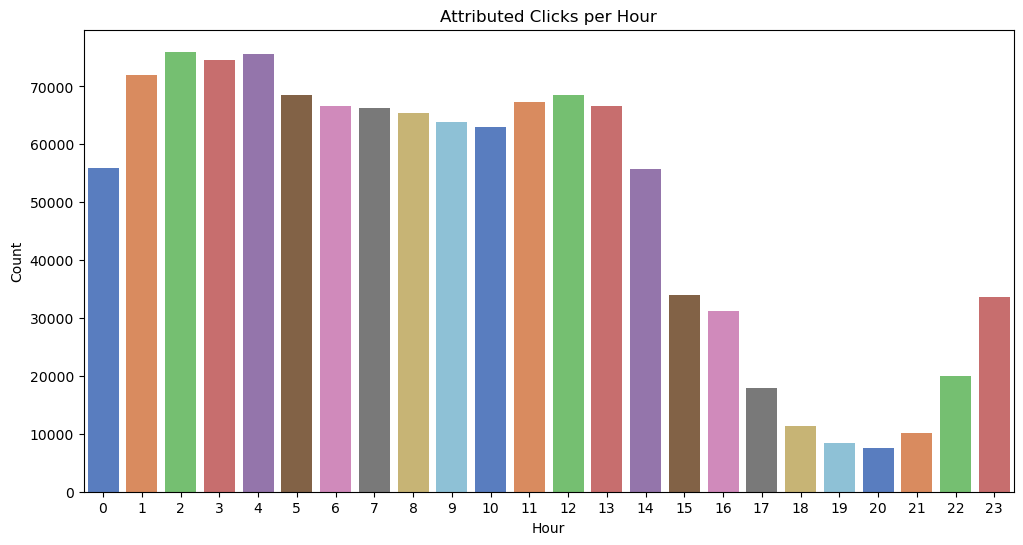

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'click_time' to datetime
balanced_data['click_time'] = pd.to_datetime(balanced_data['click_time'])

# Extract the hour from 'click_time'
balanced_data['hour'] = balanced_data['click_time'].dt.hour

# Get the unique hours and sort them
sorted_hours = sorted(balanced_data['hour'].unique())

# Plotting for attributed clicks per hour
plt.figure(figsize=(12, 6))
sns.countplot(x='hour', data=balanced_data, palette='muted', order=sorted_hours)
plt.title('Attributed Clicks per Hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()


/Users/saikrishnaadityagorthi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/saikrishnaadityagorthi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/saikrishnaadityagorthi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


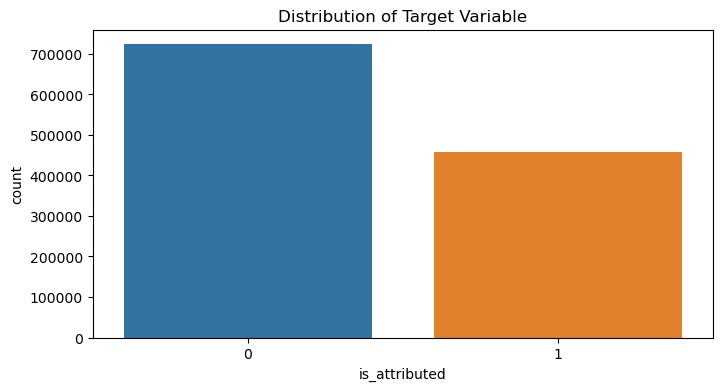

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 4))
sns.countplot(x='is_attributed', data=balanced_data)
plt.title('Distribution of Target Variable')
plt.show()

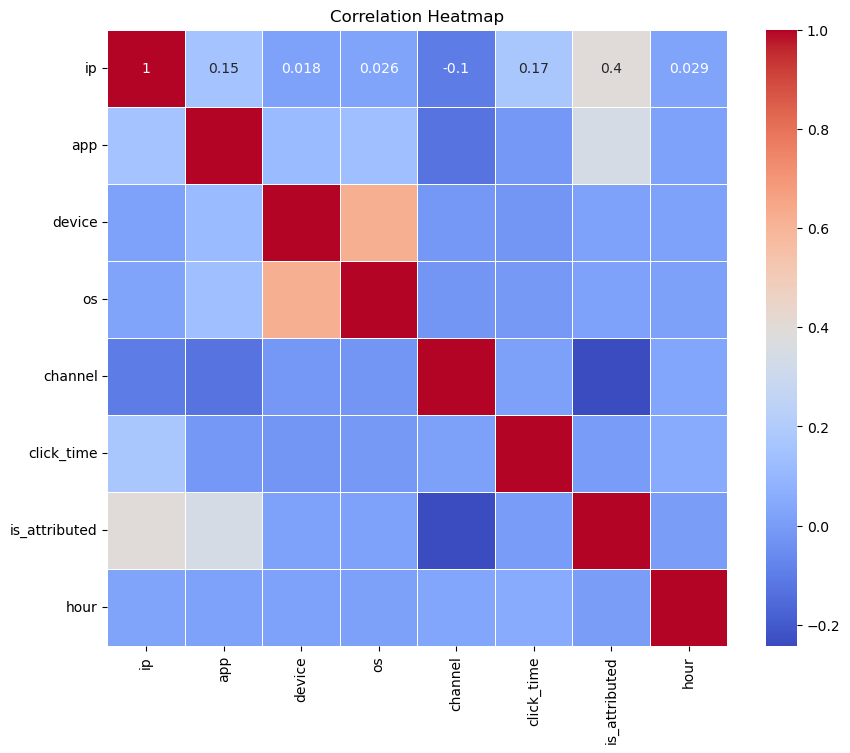

In [25]:
correlation_matrix = balanced_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

/Users/saikrishnaadityagorthi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/saikrishnaadityagorthi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/saikrishnaadityagorthi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


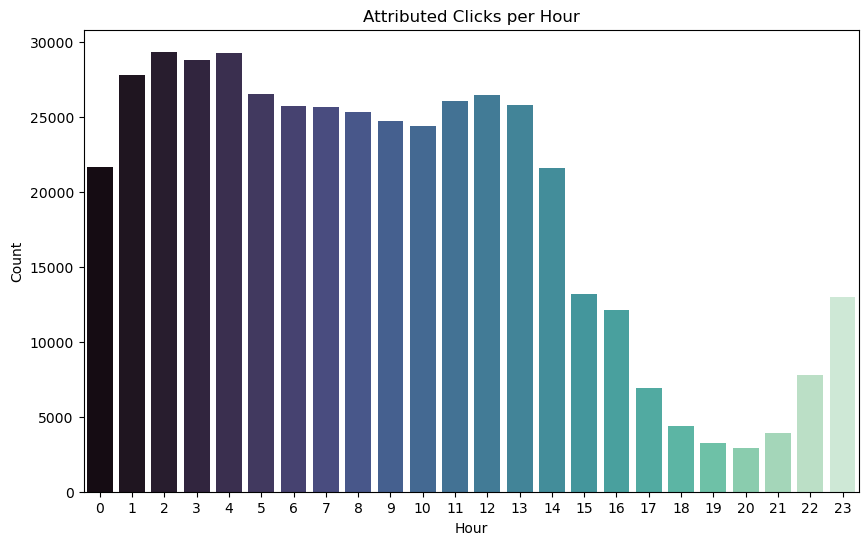

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data where is_attributed is equal to 1
attributed_data = balanced_data[balanced_data['is_attributed'] == 1]

# Plotting for attributed clicks per hour
plt.figure(figsize=(10, 6))
sns.countplot(x='hour', data=attributed_data, palette='mako')
plt.title('Attributed Clicks per Hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()


/Users/saikrishnaadityagorthi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/saikrishnaadityagorthi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/saikrishnaadityagorthi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


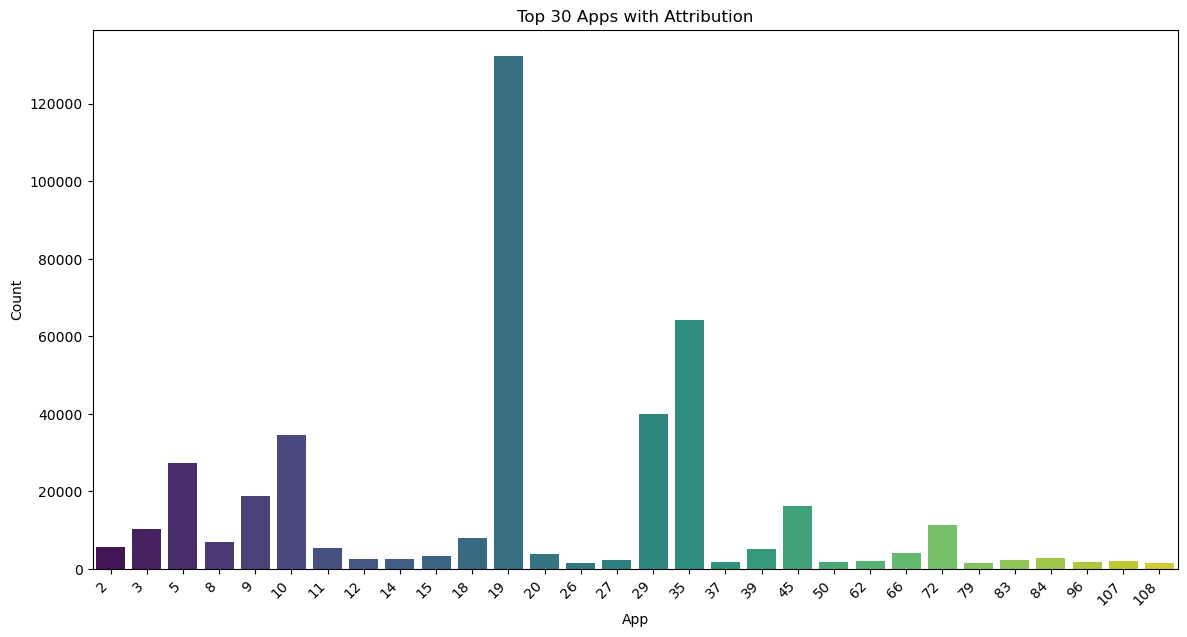

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data where is_attributed is equal to 1
attributed_data = balanced_data[balanced_data['is_attributed'] == 1]

# Get the top 30 apps
top_apps_attributed = attributed_data['app'].value_counts().nlargest(30)

# Set the figure size
plt.figure(figsize=(14, 7))

# Use Seaborn for better visualization
sns.barplot(x=top_apps_attributed.index, y=top_apps_attributed, palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('App')
plt.ylabel('Count')
plt.title('Top 30 Apps with Attribution')

# Show the plot
plt.show()


/Users/saikrishnaadityagorthi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/saikrishnaadityagorthi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/saikrishnaadityagorthi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


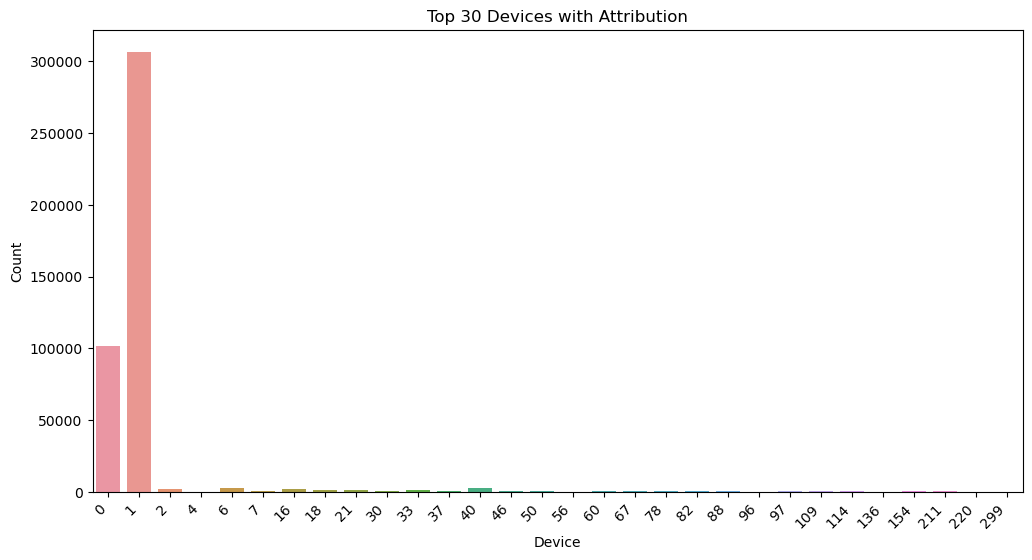

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'balanced_data' is your DataFrame

# Filter data where is_attributed is equal to 1
attributed_data = balanced_data[balanced_data['is_attributed'] == 1]

# Get the top 30 devices and OS
top_devices_attributed = attributed_data['device'].value_counts().nlargest(30)
top_os_attributed = attributed_data['os'].value_counts().nlargest(30)

# Plotting for top devices
plt.figure(figsize=(12, 6))
sns.barplot(x=top_devices_attributed.index, y=top_devices_attributed)
plt.title('Top 30 Devices with Attribution')
plt.xlabel('Device')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


/Users/saikrishnaadityagorthi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/saikrishnaadityagorthi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/saikrishnaadityagorthi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


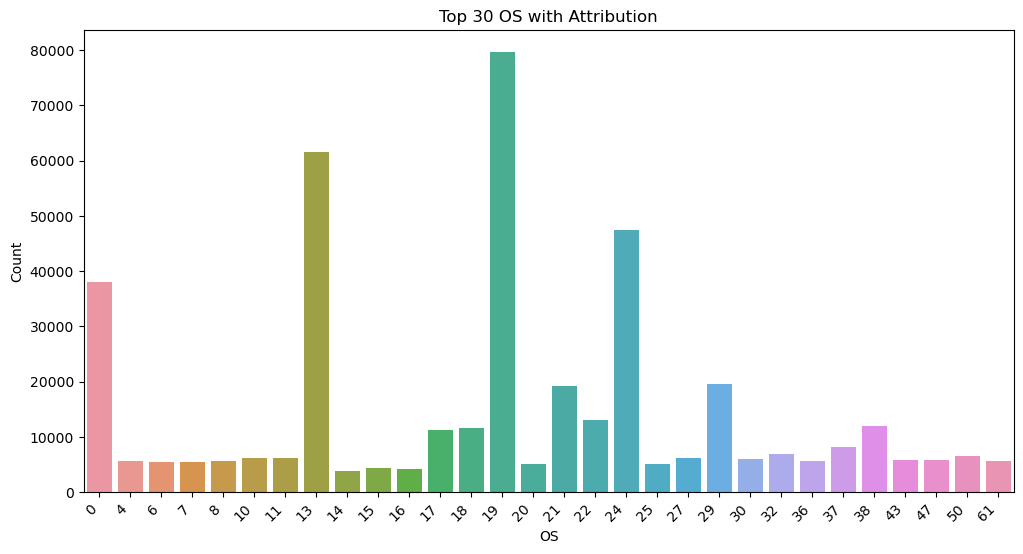

In [29]:
# Plotting for top OS
plt.figure(figsize=(12, 6))
sns.barplot(x=top_os_attributed.index, y=top_os_attributed)
plt.title('Top 30 OS with Attribution')
plt.xlabel('OS')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


/Users/saikrishnaadityagorthi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/saikrishnaadityagorthi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/saikrishnaadityagorthi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


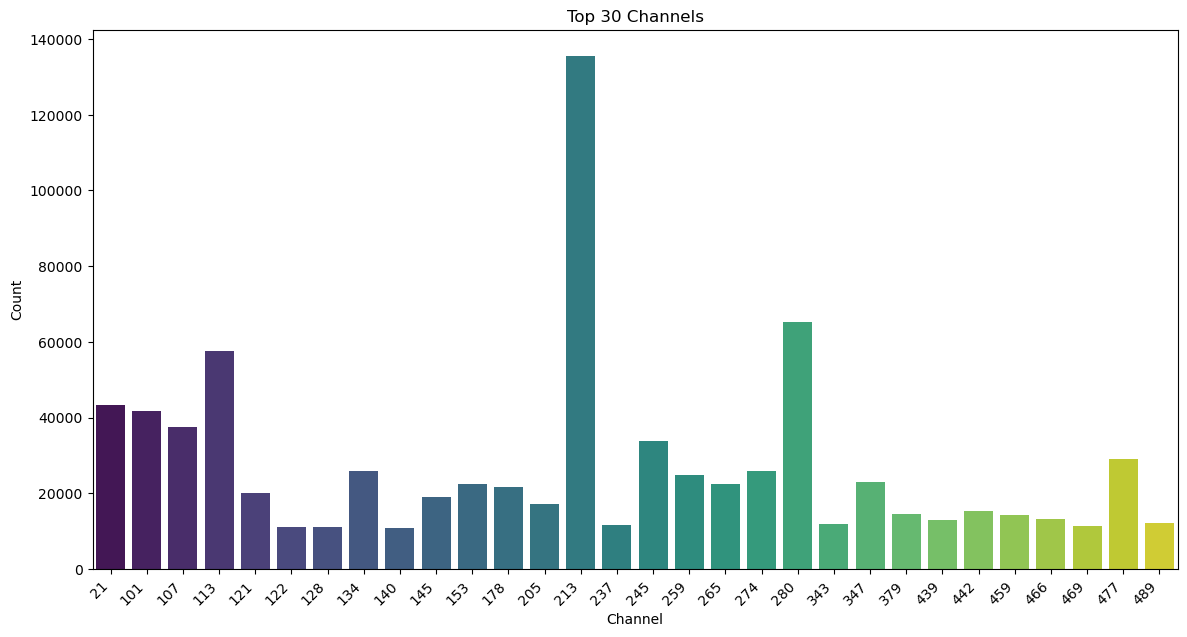

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame

# Calculate the number of clicks per channel
clicks_per_channel = balanced_data['channel'].value_counts()

# Get the top 30 channels
top_channels = clicks_per_channel.nlargest(30)

# Plotting for clicks per channel
plt.figure(figsize=(14, 7))
sns.barplot(x=top_channels.index, y=top_channels, palette='viridis')
plt.title('Top 30 Channels')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()



/Users/saikrishnaadityagorthi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/saikrishnaadityagorthi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/saikrishnaadityagorthi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


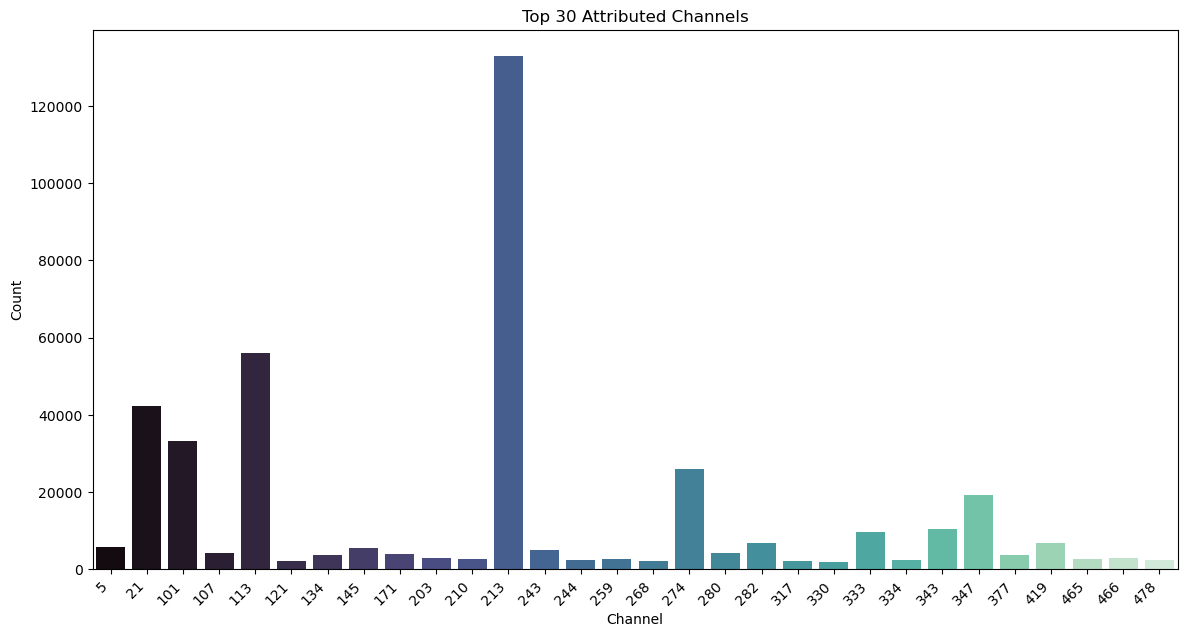

In [31]:
# Filter data where is_attributed is equal to 1
attributed_data = balanced_data[balanced_data['is_attributed'] == 1]

# Calculate the number of attributed clicks per channel
attributed_clicks_per_channel = attributed_data['channel'].value_counts()

# Get the top 30 attributed channels
top_attributed_channels = attributed_clicks_per_channel.nlargest(30)

# Plotting for top attributed channels
plt.figure(figsize=(14, 7))
sns.barplot(x=top_attributed_channels.index, y=top_attributed_channels, palette='mako')
plt.title('Top 30 Attributed Channels')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


/Users/saikrishnaadityagorthi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/saikrishnaadityagorthi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/saikrishnaadityagorthi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


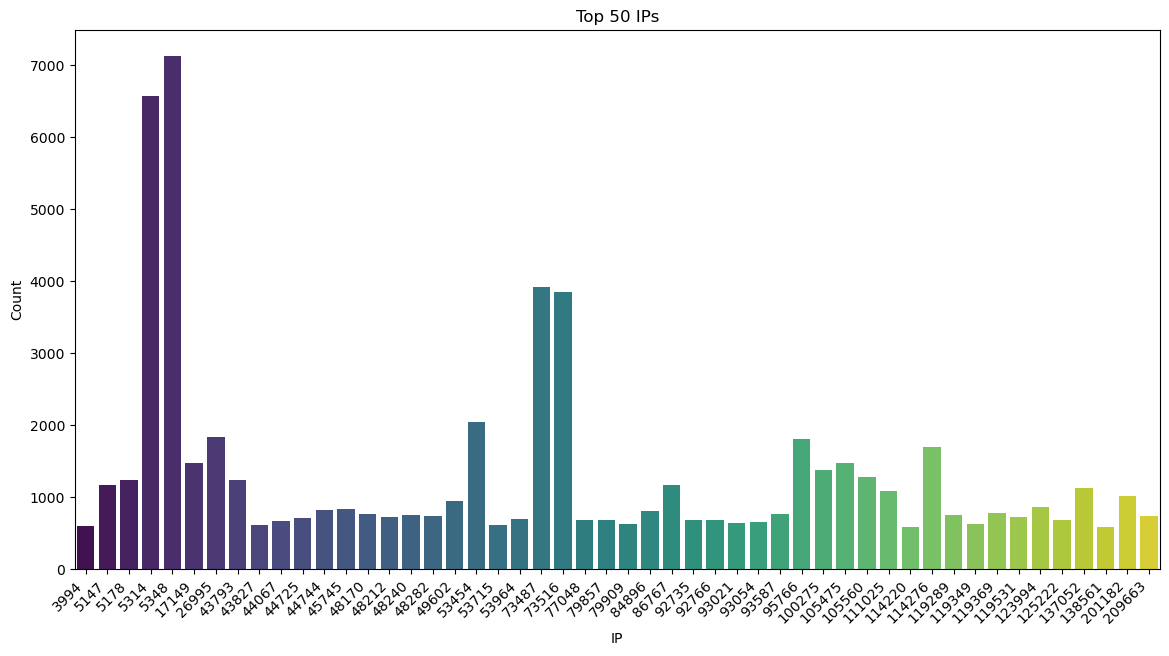

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the number of clicks per IP
clicks_per_ip = balanced_data['ip'].value_counts()

# Get the top 50 IPs
top_ips = clicks_per_ip.nlargest(50)

# Plotting for top 50 IPs
plt.figure(figsize=(14, 7))
sns.barplot(x=top_ips.index, y=top_ips, palette='viridis')
plt.title('Top 50 IPs')
plt.xlabel('IP')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


/Users/saikrishnaadityagorthi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/saikrishnaadityagorthi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/saikrishnaadityagorthi/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


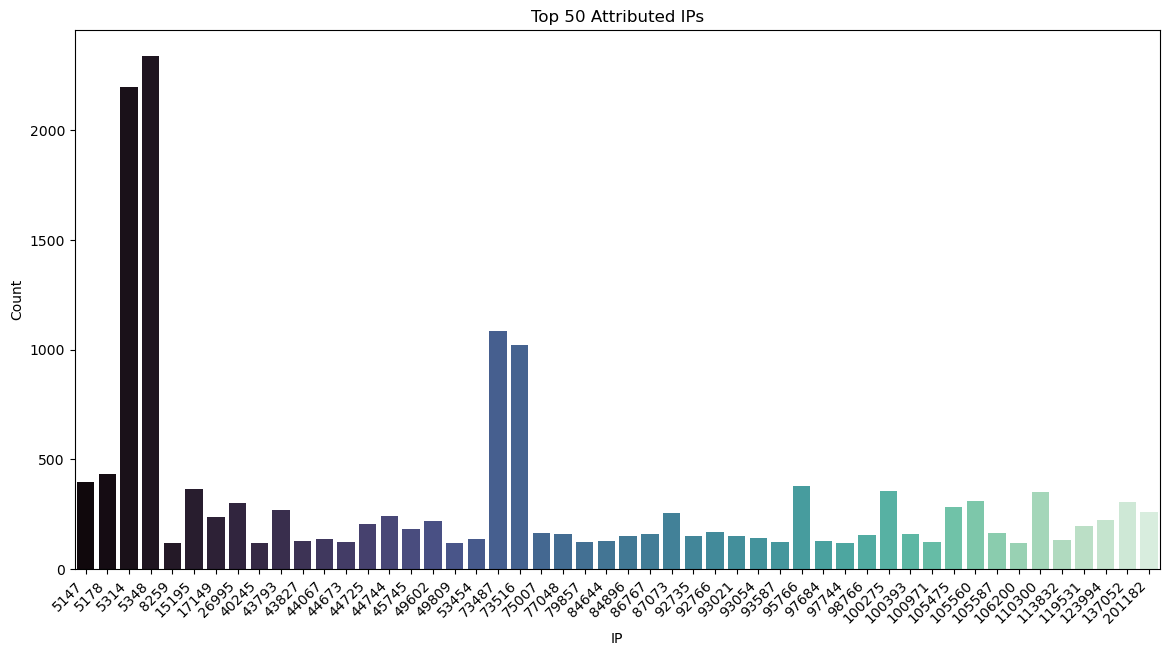

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data where is_attributed is equal to 1
attributed_data = balanced_data[balanced_data['is_attributed'] == 1]

# Calculate the number of attributed clicks per IP
attributed_clicks_per_ip = attributed_data['ip'].value_counts()

# Get the top 50 attributed IPs
top_attributed_ips = attributed_clicks_per_ip.nlargest(50)

# Plotting for top 50 attributed IPs
plt.figure(figsize=(14, 7))
sns.barplot(x=top_attributed_ips.index, y=top_attributed_ips, palette='mako')
plt.title('Top 50 Attributed IPs')
plt.xlabel('IP')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load your balanced dataset as 'balanced_data' (assumed to be preprocessed and split into features and target)

# Extract the 'hour' feature from the 'click_time' column
balanced_data['hour'] = balanced_data['click_time'].dt.hour

# Drop the 'click_time' column
balanced_data = balanced_data.drop('click_time', axis=1)

# Split the data into features and target variable
X = balanced_data.drop('is_attributed', axis=1)
y = balanced_data['is_attributed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Logistic Regression Metrics:
Accuracy: 0.75
Precision: 0.70
Recall: 0.64
F1 Score: 0.67
ROC AUC: 0.81



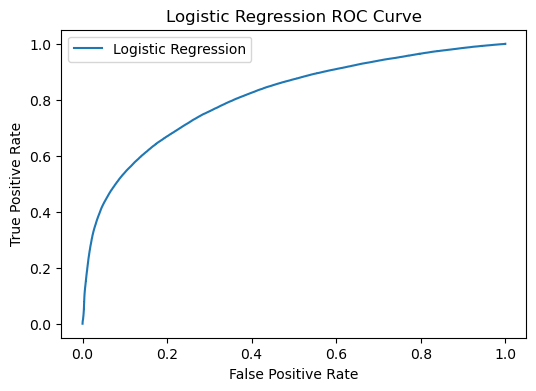

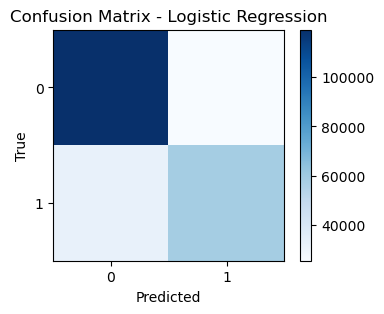

In [35]:
# Logistic Regression
from sklearn.metrics import confusion_matrix
logistic_classifier = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42)
logistic_classifier.fit(X_train, y_train)
logistic_y_pred = logistic_classifier.predict(X_test)

logistic_accuracy = accuracy_score(y_test, logistic_y_pred)
logistic_precision = precision_score(y_test, logistic_y_pred)
logistic_recall = recall_score(y_test, logistic_y_pred)
logistic_f1 = f1_score(y_test, logistic_y_pred)
logistic_roc_auc = roc_auc_score(y_test, logistic_classifier.predict_proba(X_test)[:, 1])
logistic_confusion_matrix = confusion_matrix(y_test, logistic_y_pred)

# Print results
print('Logistic Regression Metrics:')
print(f'Accuracy: {logistic_accuracy:.2f}')
print(f'Precision: {logistic_precision:.2f}')
print(f'Recall: {logistic_recall:.2f}')
print(f'F1 Score: {logistic_f1:.2f}')
print(f'ROC AUC: {logistic_roc_auc:.2f}')
print()

# Plot ROC curve
plt.figure(figsize=(6, 4))
fpr, tpr, _ = roc_curve(y_test, logistic_classifier.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend()
plt.show()

# Plot confusion matrix
plt.figure(figsize=(4, 3))
plt.imshow(logistic_confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['0', '1'], rotation=0)
plt.yticks(tick_marks, ['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Random Forest Metrics:
Accuracy: 0.92
Precision: 0.92
Recall: 0.87
F1 Score: 0.89
ROC AUC: 0.96



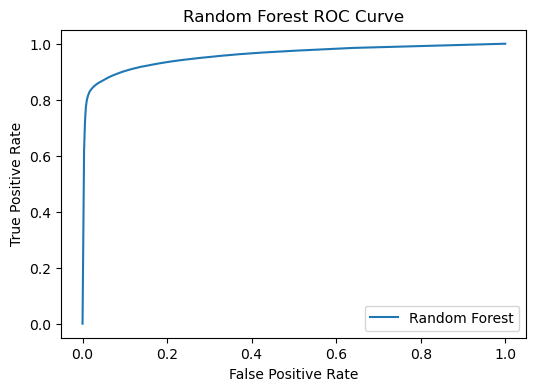

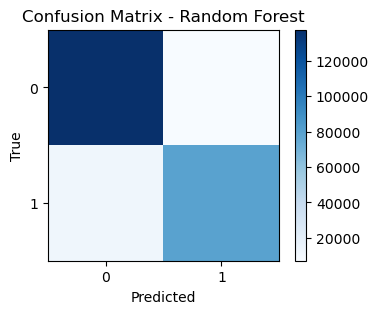

In [36]:
# Random Forest
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train, y_train)
random_forest_y_pred = random_forest_classifier.predict(X_test)

random_forest_accuracy = accuracy_score(y_test, random_forest_y_pred)
random_forest_precision = precision_score(y_test, random_forest_y_pred)
random_forest_recall = recall_score(y_test, random_forest_y_pred)
random_forest_f1 = f1_score(y_test, random_forest_y_pred)
random_forest_roc_auc = roc_auc_score(y_test, random_forest_classifier.predict_proba(X_test)[:, 1])
random_forest_confusion_matrix = confusion_matrix(y_test, random_forest_y_pred)

# Print results
print('Random Forest Metrics:')
print(f'Accuracy: {random_forest_accuracy:.2f}')
print(f'Precision: {random_forest_precision:.2f}')
print(f'Recall: {random_forest_recall:.2f}')
print(f'F1 Score: {random_forest_f1:.2f}')
print(f'ROC AUC: {random_forest_roc_auc:.2f}')
print()

# Plot ROC curve
plt.figure(figsize=(6, 4))
fpr, tpr, _ = roc_curve(y_test, random_forest_classifier.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend()
plt.show()

# Plot confusion matrix
plt.figure(figsize=(4, 3))
plt.imshow(random_forest_confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Random Forest')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['0', '1'], rotation=0)
plt.yticks(tick_marks, ['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



Gradient Boosting Metrics:
Accuracy: 0.92
Precision: 0.96
Recall: 0.83
F1 Score: 0.89
ROC AUC: 0.96



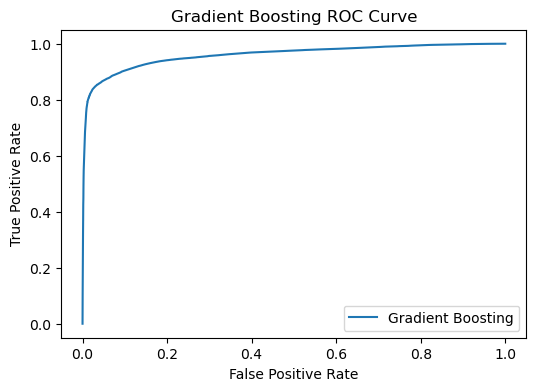

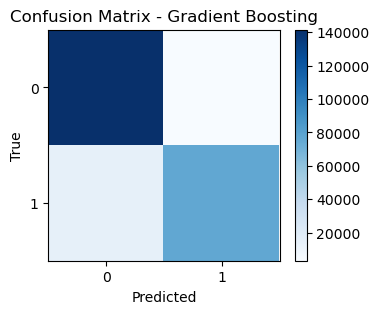

In [37]:
# Gradient Boosting
gradient_boosting_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gradient_boosting_classifier.fit(X_train, y_train)
gradient_boosting_y_pred = gradient_boosting_classifier.predict(X_test)

gradient_boosting_accuracy = accuracy_score(y_test, gradient_boosting_y_pred)
gradient_boosting_precision = precision_score(y_test, gradient_boosting_y_pred)
gradient_boosting_recall = recall_score(y_test, gradient_boosting_y_pred)
gradient_boosting_f1 = f1_score(y_test, gradient_boosting_y_pred)
gradient_boosting_roc_auc = roc_auc_score(y_test, gradient_boosting_classifier.predict_proba(X_test)[:, 1])
gradient_boosting_confusion_matrix = confusion_matrix(y_test, gradient_boosting_y_pred)

# Print results
print('Gradient Boosting Metrics:')
print(f'Accuracy: {gradient_boosting_accuracy:.2f}')
print(f'Precision: {gradient_boosting_precision:.2f}')
print(f'Recall: {gradient_boosting_recall:.2f}')
print(f'F1 Score: {gradient_boosting_f1:.2f}')
print(f'ROC AUC: {gradient_boosting_roc_auc:.2f}')
print()

# Plot ROC curve
plt.figure(figsize=(6, 4))
fpr, tpr, _ = roc_curve(y_test, gradient_boosting_classifier.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='Gradient Boosting')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting ROC Curve')
plt.legend()
plt.show()

# Plot confusion matrix
plt.figure(figsize=(4, 3))
plt.imshow(gradient_boosting_confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Gradient Boosting')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['0', '1'], rotation=0)
plt.yticks(tick_marks, ['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


K-NN Metrics:
Accuracy: 0.86
Precision: 0.84
Recall: 0.78
F1 Score: 0.81



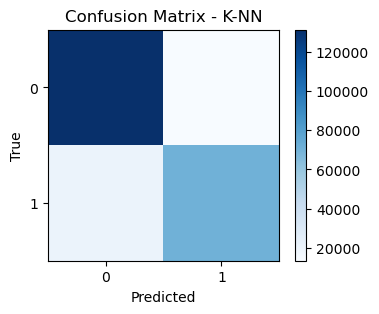

In [38]:
# K-Nearest Neighbors
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_y_pred = knn_classifier.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_precision = precision_score(y_test, knn_y_pred)
knn_recall = recall_score(y_test, knn_y_pred)
knn_f1 = f1_score(y_test, knn_y_pred)
knn_confusion_matrix = confusion_matrix(y_test, knn_y_pred)

# Print results
print('K-NN Metrics:')
print(f'Accuracy: {knn_accuracy:.2f}')
print(f'Precision: {knn_precision:.2f}')
print(f'Recall: {knn_recall:.2f}')
print(f'F1 Score: {knn_f1:.2f}')
print()

# Plot confusion matrix
plt.figure(figsize=(4, 3))
plt.imshow(knn_confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - K-NN')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['0', '1'], rotation=0)
plt.yticks(tick_marks, ['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Neural Network Metrics:
Accuracy: 0.80
Precision: 0.85
Recall: 0.59
F1 Score: 0.70



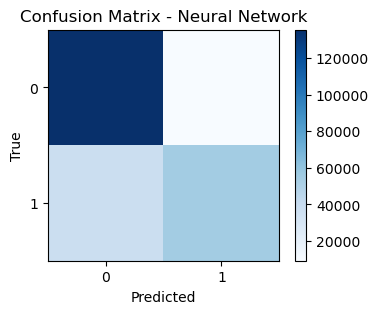

In [39]:
# Neural Network
nn_classifier = MLPClassifier(max_iter=1000)
nn_classifier.fit(X_train, y_train)
nn_y_pred = nn_classifier.predict(X_test)

nn_accuracy = accuracy_score(y_test, nn_y_pred)
nn_precision = precision_score(y_test, nn_y_pred)
nn_recall = recall_score(y_test, nn_y_pred)
nn_f1 = f1_score(y_test, nn_y_pred)
nn_confusion_matrix = confusion_matrix(y_test, nn_y_pred)

# Print results
print('Neural Network Metrics:')
print(f'Accuracy: {nn_accuracy:.2f}')
print(f'Precision: {nn_precision:.2f}')
print(f'Recall: {nn_recall:.2f}')
print(f'F1 Score: {nn_f1:.2f}')
print()

# Plot confusion matrix
plt.figure(figsize=(4, 3))
plt.imshow(nn_confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Neural Network')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['0', '1'], rotation=0)
plt.yticks(tick_marks, ['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Naive Bayes Metrics:
Accuracy: 0.76
Precision: 0.80
Recall: 0.50
F1 Score: 0.61



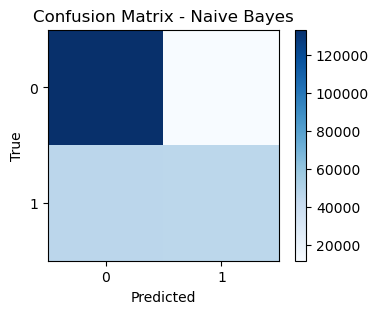

In [40]:
# Naive Bayes
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)
naive_bayes_y_pred = naive_bayes_classifier.predict(X_test)

naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_y_pred)
naive_bayes_precision = precision_score(y_test, naive_bayes_y_pred)
naive_bayes_recall = recall_score(y_test, naive_bayes_y_pred)
naive_bayes_f1 = f1_score(y_test, naive_bayes_y_pred)
naive_bayes_confusion_matrix = confusion_matrix(y_test, naive_bayes_y_pred)

# Print results
print('Naive Bayes Metrics:')
print(f'Accuracy: {naive_bayes_accuracy:.2f}')
print(f'Precision: {naive_bayes_precision:.2f}')
print(f'Recall: {naive_bayes_recall:.2f}')
print(f'F1 Score: {naive_bayes_f1:.2f}')
print()

# Plot confusion matrix
plt.figure(figsize=(4, 3))
plt.imshow(naive_bayes_confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Naive Bayes')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['0', '1'], rotation=0)
plt.yticks(tick_marks, ['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Decision Tree Metrics:
Accuracy: 0.89
Precision: 0.86
Recall: 0.87
F1 Score: 0.86



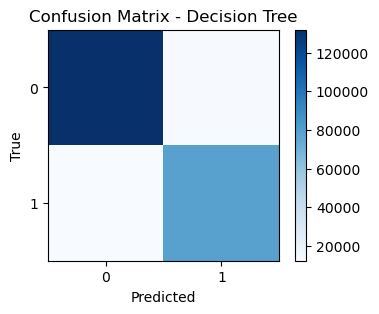

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# Create and train the Decision Tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
decision_tree_y_pred = model.predict(X_test)

# Calculate metrics
decision_tree_accuracy = accuracy_score(y_test, decision_tree_y_pred)
decision_tree_precision = precision_score(y_test, decision_tree_y_pred)
decision_tree_recall = recall_score(y_test, decision_tree_y_pred)
decision_tree_f1 = f1_score(y_test, decision_tree_y_pred)
decision_tree_confusion_matrix = confusion_matrix(y_test, decision_tree_y_pred)

# Print results
print('Decision Tree Metrics:')
print(f'Accuracy: {decision_tree_accuracy:.2f}')
print(f'Precision: {decision_tree_precision:.2f}')
print(f'Recall: {decision_tree_recall:.2f}')
print(f'F1 Score: {decision_tree_f1:.2f}')
print()

# Plot confusion matrix
plt.figure(figsize=(4, 3))
plt.imshow(decision_tree_confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Decision Tree')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['0', '1'], rotation=0)
plt.yticks(tick_marks, ['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

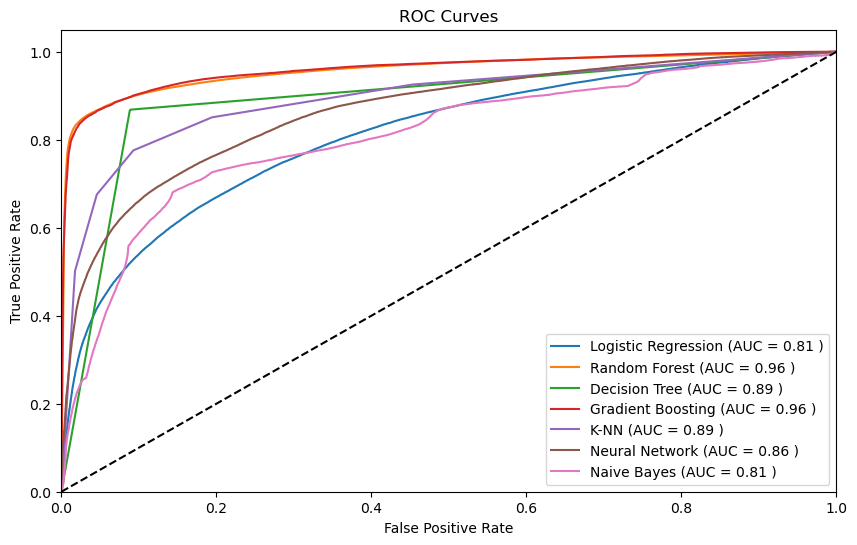

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Initialize classifiers with previously trained models
classifiers = {
    'Logistic Regression': logistic_classifier,  # Replace with your logistic regression model
    'Random Forest': random_forest_classifier,  # Replace with your random forest model
    'Decision Tree':model,
    'Gradient Boosting': gradient_boosting_classifier,  # Replace with your gradient boosting model
    'K-NN': knn_classifier,  # Replace with your K-NN model
    'Neural Network': nn_classifier,  # Replace with your neural network model
    'Naive Bayes': naive_bayes_classifier  # Replace with your naive bayes model
}

plt.figure(figsize=(10, 6))

for name, classifier in classifiers.items():
    fpr, tpr, _ = roc_curve(y_test, classifier.predict_proba(X_test)[:, 1])
    roc_auc = roc_auc_score(y_test, classifier.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f} )')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()


In [43]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Define the objective function to optimize
def objective(trial):
    # Define hyperparameters to tune
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'min_samples_split': trial.suggest_float('min_samples_split', 0.1, 1),
        'min_samples_leaf': trial.suggest_float('min_samples_leaf', 0.1, 0.5),
    }

    # Create the RandomForestClassifier with the current set of hyperparameters
    model = RandomForestClassifier(random_state=42, **params)

    # Use cross-validation to get an estimate of the model's performance
    score = cross_val_score(model, X_train, y_train, n_jobs=-1, cv=3).mean()

    return score

# Create a study object and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=25)

# Get the best parameters from the study
best_params = study.best_params
print("Best Parameters: ", best_params)

# Create the final RandomForestClassifier using the best parameters
final_random_forest_classifier = RandomForestClassifier(random_state=42, **best_params)

# Fit the model to the training data
final_random_forest_classifier.fit(X_train, y_train)

# Now you can use final_random_forest_classifier to make predictions on new data
y_pred = final_random_forest_classifier.predict(X_test)



[I 2023-12-09 18:27:33,085] A new study created in memory with name: no-name-12efcf9d-a5fb-48d9-98c5-ac8d664419cf
[I 2023-12-09 18:27:39,499] Trial 0 finished with value: 0.6130401438903278 and parameters: {'n_estimators': 76, 'max_depth': 8, 'min_samples_split': 0.6175544228248986, 'min_samples_leaf': 0.44184009433248933}. Best is trial 0 with value: 0.6130401438903278.
[I 2023-12-09 18:27:46,032] Trial 1 finished with value: 0.6130401438903278 and parameters: {'n_estimators': 90, 'max_depth': 14, 'min_samples_split': 0.654378666702136, 'min_samples_leaf': 0.47199474209691056}. Best is trial 0 with value: 0.6130401438903278.
[I 2023-12-09 18:27:55,477] Trial 2 finished with value: 0.6130401438903278 and parameters: {'n_estimators': 145, 'max_depth': 10, 'min_samples_split': 0.7085420693291933, 'min_samples_leaf': 0.1444846391324024}. Best is trial 0 with value: 0.6130401438903278.
[I 2023-12-09 18:28:02,666] Trial 3 finished with value: 0.6130401438903278 and parameters: {'n_estimator

Best Parameters:  {'n_estimators': 55, 'max_depth': 7, 'min_samples_split': 0.2573585226245216, 'min_samples_leaf': 0.10006840792076302}


In [44]:
random_forest_accuracy = accuracy_score(y_test, y_pred)
random_forest_precision = precision_score(y_test, y_pred)
random_forest_recall = recall_score(y_test, y_pred)
random_forest_f1 = f1_score(y_test, y_pred)


# Print results
print('Random Forest Metrics:')
print(f'Accuracy: {random_forest_accuracy:.2f}')
print(f'Precision: {random_forest_precision:.2f}')
print(f'Recall: {random_forest_recall:.2f}')
print(f'F1 Score: {random_forest_f1:.2f}')
print()


Random Forest Metrics:
Accuracy: 0.85
Precision: 0.79
Recall: 0.83
F1 Score: 0.81



In [45]:

import pickle
from sklearn.ensemble import RandomForestClassifier

# Assuming you have a trained RandomForestClassifier named final_random_forest_classifier
# If not, replace it with your actual model variable

# Save the model to a file using pickle
with open('final_random_forest_model.pkl', 'wb') as file:
    pickle.dump(random_forest_classifier, file)